# НЕЙРОНКА

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import tensorflow as tf
import tensorflow.keras.regularizers
print(tf.__version__)
from sklearn.metrics import r2_score

2.8.0


In [52]:
df = pd.read_csv("data/df_norm.csv")
df.drop(columns =['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.601381,0.447061,0.123047,0.607435,0.482823,0.16223,0.321894,0.698235,0.517418,0.0,0.275109,0.544652
1,0.282131,0.601381,0.447061,0.608021,0.418887,0.549664,0.16223,0.321894,0.698235,0.517418,0.0,0.344539,0.365074
2,0.457857,0.601381,0.455721,0.502800,0.495653,0.482823,0.16223,0.321894,0.698235,0.517418,0.0,0.344539,0.503211
3,0.457201,0.527898,0.452685,0.502800,0.495653,0.482823,0.16223,0.321894,0.698235,0.517418,0.0,0.344539,0.544652
4,0.419084,0.307448,0.488508,0.502800,0.495653,0.482823,0.16223,0.321894,0.698235,0.517418,0.0,0.344539,0.682789


In [3]:
columns_name = df.columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       999 non-null    float64
 1   Плотность, кг/м3                      999 non-null    float64
 2   модуль упругости, ГПа                 999 non-null    float64
 3   Количество отвердителя, м.%           999 non-null    float64
 4   Содержание эпоксидных групп,%_2       999 non-null    float64
 5   Температура вспышки, С_2              999 non-null    float64
 6   Поверхностная плотность, г/м2         999 non-null    float64
 7   Модуль упругости при растяжении, ГПа  999 non-null    float64
 8   Прочность при растяжении, МПа         999 non-null    float64
 9   Потребление смолы, г/м2               999 non-null    float64
 10  Угол нашивки, град                    999 non-null    float64
 11  Шаг нашивки        

In [5]:
df.astype('float32')

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.601381,0.447061,0.123047,0.607435,0.482823,0.162230,0.321894,0.698235,0.517418,0.0,0.275109,0.544652
1,0.282131,0.601381,0.447061,0.608021,0.418887,0.549664,0.162230,0.321894,0.698235,0.517418,0.0,0.344539,0.365074
2,0.457857,0.601381,0.455721,0.502800,0.495653,0.482823,0.162230,0.321894,0.698235,0.517418,0.0,0.344539,0.503211
3,0.457201,0.527898,0.452685,0.502800,0.495653,0.482823,0.162230,0.321894,0.698235,0.517418,0.0,0.344539,0.544652
4,0.419084,0.307448,0.488508,0.502800,0.495653,0.482823,0.162230,0.321894,0.698235,0.517418,0.0,0.344539,0.682789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.361750,0.410540,0.552781,0.350139,0.333908,0.657301,0.161609,0.489229,0.480312,0.242759,1.0,0.627565,0.365347
995,0.587163,0.650588,0.268550,0.712271,0.294428,0.350746,0.271207,0.480019,0.470745,0.221717,1.0,0.730963,0.458327
996,0.555750,0.460227,0.251612,0.494656,0.623085,0.325580,0.572959,0.578197,0.578340,0.565435,1.0,0.286298,0.650046
997,0.637396,0.691520,0.448724,0.684130,0.267818,0.444436,0.496511,0.540754,0.368070,0.451281,1.0,0.435716,0.520631


In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col}, процент пропусков: {pct_missing*100}')

Соотношение матрица-наполнитель, процент пропусков: 0.0
Плотность, кг/м3, процент пропусков: 0.0
модуль упругости, ГПа, процент пропусков: 0.0
Количество отвердителя, м.%, процент пропусков: 0.0
Содержание эпоксидных групп,%_2, процент пропусков: 0.0
Температура вспышки, С_2, процент пропусков: 0.0
Поверхностная плотность, г/м2, процент пропусков: 0.0
Модуль упругости при растяжении, ГПа, процент пропусков: 0.0
Прочность при растяжении, МПа, процент пропусков: 0.0
Потребление смолы, г/м2, процент пропусков: 0.0
Угол нашивки, град, процент пропусков: 0.0
Шаг нашивки, процент пропусков: 0.0
Плотность нашивки, процент пропусков: 0.0


In [10]:
mean=df.mean().sort_values()
mean

Поверхностная плотность, г/м2           0.371058
модуль упругости, ГПа                   0.446887
Плотность, кг/м3                        0.467798
Шаг нашивки                             0.477203
Температура вспышки, С_2                0.488685
Соотношение матрица-наполнитель         0.489727
Содержание эпоксидных групп,%_2         0.493097
Угол нашивки, град                      0.496496
Количество отвердителя, м.%             0.496747
Модуль упругости при растяжении, ГПа    0.501023
Плотность нашивки                       0.507132
Прочность при растяжении, МПа           0.508273
Потребление смолы, г/м2                 0.512182
dtype: float64

Построим как это выглядит на графике и нарисуем предполагаемый график y = 2^x/2+4*x^2+2, ну это просто развиваем гипотезу, понятно что это не так

In [54]:
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.601381,0.447061,0.123047,0.607435,0.482823,0.162230,0.321894,0.698235,0.517418,0.0,0.275109,0.544652
1,0.282131,0.601381,0.447061,0.608021,0.418887,0.549664,0.162230,0.321894,0.698235,0.517418,0.0,0.344539,0.365074
2,0.457857,0.601381,0.455721,0.502800,0.495653,0.482823,0.162230,0.321894,0.698235,0.517418,0.0,0.344539,0.503211
3,0.457201,0.527898,0.452685,0.502800,0.495653,0.482823,0.162230,0.321894,0.698235,0.517418,0.0,0.344539,0.544652
4,0.419084,0.307448,0.488508,0.502800,0.495653,0.482823,0.162230,0.321894,0.698235,0.517418,0.0,0.344539,0.682789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.361750,0.410540,0.552781,0.350139,0.333908,0.657301,0.161609,0.489229,0.480312,0.242759,1.0,0.627565,0.365347
995,0.587163,0.650588,0.268550,0.712271,0.294428,0.350746,0.271207,0.480019,0.470745,0.221717,1.0,0.730963,0.458327
996,0.555750,0.460227,0.251612,0.494656,0.623085,0.325580,0.572959,0.578197,0.578340,0.565435,1.0,0.286298,0.650046
997,0.637396,0.691520,0.448724,0.684130,0.267818,0.444436,0.496511,0.540754,0.368070,0.451281,1.0,0.435716,0.520631


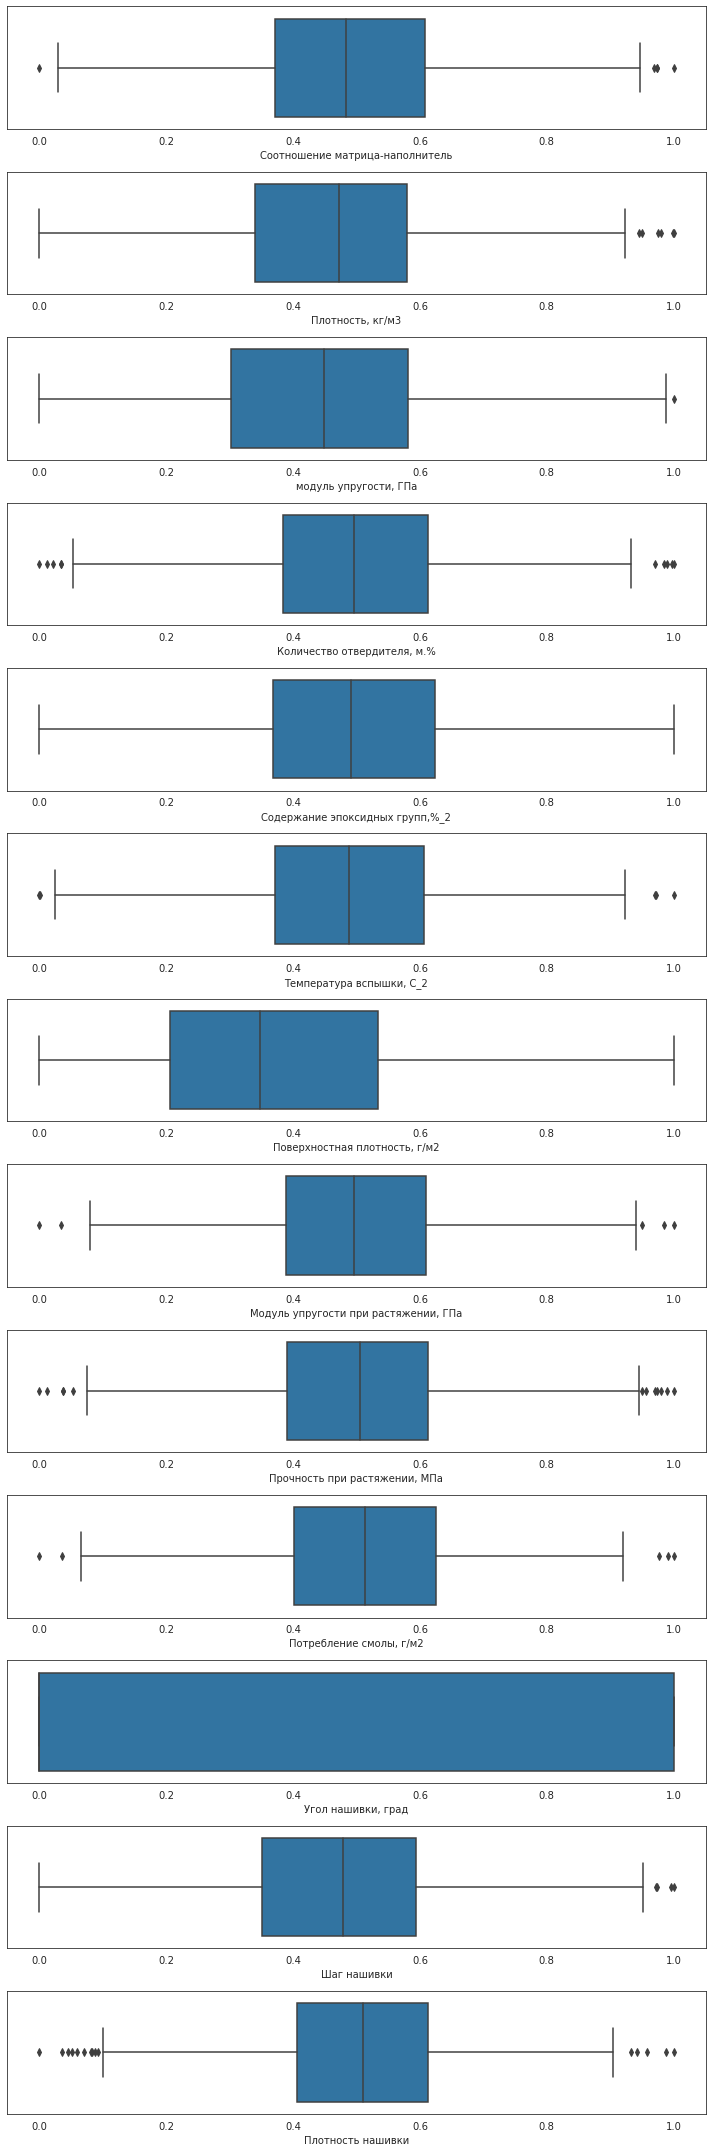

In [55]:
f = plt.figure(figsize=(10, 30))
gs = f.add_gridspec(13, 1)
for col in columns_name:
    with sns.axes_style('white'):
        ax = f.add_subplot(gs[list(columns_name).index(col), 0])
        sns.boxplot(x=df[col])

f.tight_layout()

In [74]:
y_NN = df['Соотношение матрица-наполнитель']
X_NN = df.drop(columns=['Соотношение матрица-наполнитель'])

In [75]:
X_NN_train, X_NN_test, y_NN_train, y_NN_test = train_test_split(X_NN,y_NN, test_size=0.3, random_state=42)

In [76]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, activation='relu',
                 input_shape=(12,)),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(1)
])
  

In [77]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='mse',       
              metrics=['mae'])

In [78]:
history = model.fit(X_NN_train, y_NN_train, batch_size=35, epochs=10, verbose=0, validation_data=(X_NN_test, y_NN_test))

In [79]:
y_predict_NN = model.predict(X_NN_test)
y_predict_NN[0]

array([0.4437846], dtype=float32)

In [80]:
R2_NU_1 = r2_score(y_NN_test, y_predict_NN)
R2_NU_1

-0.05970968550609412

In [81]:
hist_1 = pd.DataFrame(history.history)
hist_1['epoch'] = history.epoch
hist_1.head()

,loss,mae,val_loss,val_mae,epoch
0,0.062163,0.202401,0.036802,0.149880,0
1,0.037973,0.156786,0.036036,0.148290,1
2,0.034208,0.148683,0.033610,0.142631,2
3,0.033296,0.146941,0.032252,0.139742,3
4,0.032635,0.144335,0.031692,0.139639,4


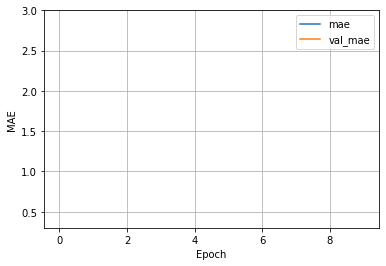

In [82]:
plt.plot(hist_1['mae'], label='mae')
plt.plot(hist_1['val_mae'], label='val_mae')
plt.ylim([0.3, 3])
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

12 - 6- 6 -1

In [83]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, activation='relu',
                 input_shape=(12,)),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(1)
])

In [84]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='mse',       
              metrics=['mae'])

In [85]:
history = model.fit(X_NN_train, y_NN_train, batch_size=35, epochs=10, verbose=0, validation_data=(X_NN_test, y_NN_test))

In [86]:
y_predict_NN = model.predict(X_NN_test)
y_predict_NN[0]

array([0.45887184], dtype=float32)

In [87]:
R2_NU_2 = r2_score(y_NN_test, y_predict_NN)
R2_NU_2

-0.021145528324755247

In [88]:
hist_2 = pd.DataFrame(history.history)
hist_2['epoch'] = history.epoch
hist_2.head()

,loss,mae,val_loss,val_mae,epoch
0,0.047383,0.173384,0.036059,0.151280,0
1,0.034147,0.147836,0.032478,0.140395,1
2,0.031890,0.143634,0.030811,0.136807,2
3,0.031829,0.144041,0.030654,0.137582,3
4,0.031202,0.142776,0.030610,0.136008,4


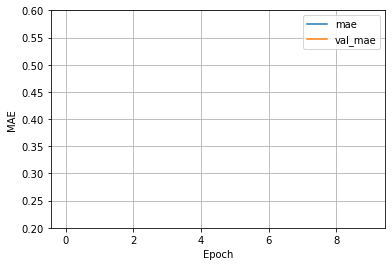

In [89]:
plt.plot(hist_2['mae'], label='mae')
plt.plot(hist_2['val_mae'], label='val_mae')
plt.ylim([0.2, 0.6])
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

Text(0.5, 1.0, 'Метрика ошибки R2 для разных признаков')

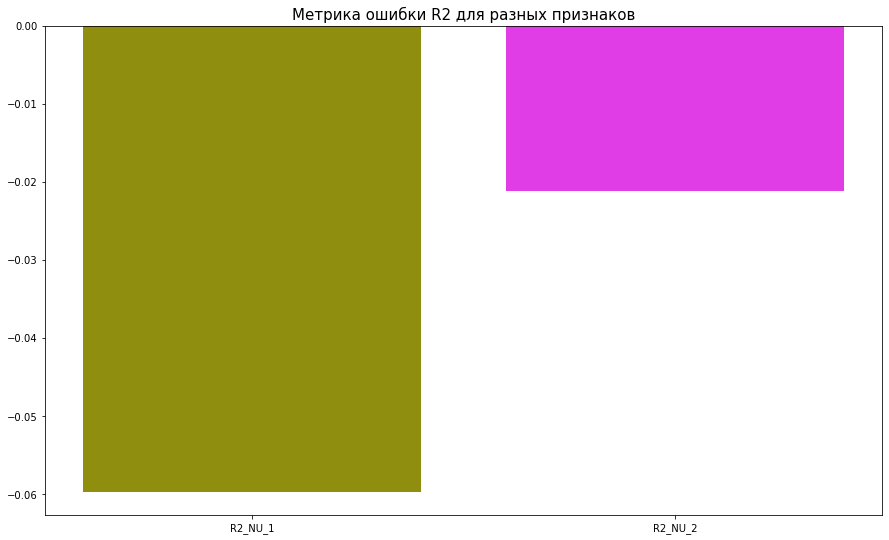

In [90]:
data = {'R2_NU_1': R2_NU_1, 'R2_NU_2': R2_NU_2}
names = list(data.keys())
values = list(data.values())
color_rectangle = np.random.rand(3, 3)

plt.subplots(figsize=(15, 9), sharey=True)
plt.bar(names, values,color = color_rectangle, label=names)
plt.title("Метрика ошибки R2 для разных признаков", fontsize=15)

модель 12-6-6-1 лучше, и тут метрика R2 около 0